In [5]:
from trulens.nn.attribution import IntegratedGradients
from trulens.visualizations import MaskVisualizer

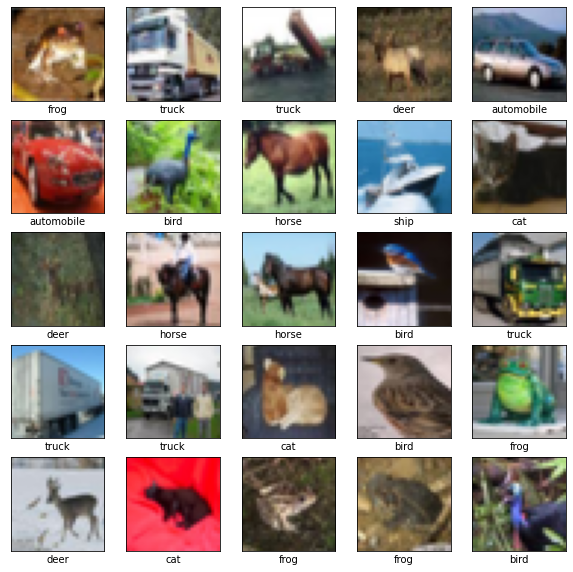

In [7]:
# quickly train a model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2022-03-25 21:14:33.430041: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5718 - accuracy: 0.4272 - val_loss: 1.3061 - val_accuracy: 0.5286
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1831 - accuracy: 0.5791 - val_loss: 1.0911 - val_accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0275 - accuracy: 0.6359 - val_loss: 0.9916 - val_accuracy: 0.6477
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9428 - accuracy: 0.6702 - val_loss: 0.9483 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8776 - accuracy: 0.6936 - val_loss: 1.0462 - val_accuracy: 0.6408
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8212 - accuracy: 0.7142 - val_loss: 0.9198 - val_accuracy: 0.6857
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7805 - accuracy: 0.7272 - val_loss: 0.9035 -

313/313 - 1s - loss: 0.9017 - accuracy: 0.6994 - 963ms/epoch - 3ms/step


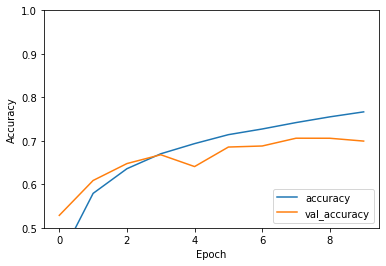

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

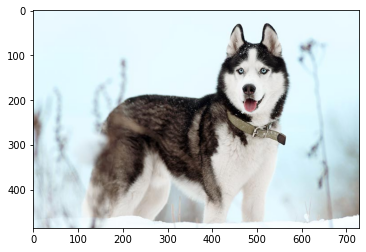

In [27]:
with PIL.Image.open('husky.jpeg') as img:
    plt.imshow(img)
    x = np.array(img.resize((224,224), PIL.Image.ANTIALIAS))[np.newaxis]
    x_pp = preprocess_input(np.array(x, copy=True))
    vgg_result = keras_model.predict(x_pp)

In [39]:
type(PIL.Image.ANTIALIAS)

int

In [32]:
print(vgg_result)

decode_predictions(vgg_result)

[[2.38078424e-09 1.39851530e-09 8.78942956e-07 1.58142683e-07
  1.65963279e-08 4.39776482e-09 1.49258139e-09 1.37742235e-08
  8.76226292e-09 1.28314239e-08 4.51642634e-09 1.19068266e-08
  1.38567480e-09 1.49437753e-07 9.68765734e-10 3.13339354e-09
  1.19487851e-07 2.32717863e-08 1.76904020e-08 9.42365830e-09
  4.39164571e-09 1.38757974e-08 1.16731211e-08 9.36279676e-09
  4.46034711e-08 1.76943737e-09 1.41290037e-08 5.68835201e-09
  3.53444474e-09 3.22465112e-08 3.87710708e-09 7.45319095e-09
  2.52566945e-09 3.23481353e-09 1.47706531e-08 1.11047516e-09
  4.33428538e-09 3.37717215e-10 1.11951399e-08 2.79316148e-09
  2.42459990e-08 5.11455189e-09 2.42581533e-09 2.91549562e-09
  1.70012751e-08 2.97125130e-10 4.40276082e-08 3.59830987e-09
  9.41201339e-10 3.95589206e-09 3.58399421e-09 1.08638512e-08
  1.84273095e-08 2.28832042e-09 6.69409728e-09 8.70811423e-09
  2.76829351e-08 1.14000391e-08 1.96997463e-09 3.40342936e-08
  9.03514561e-08 3.10737498e-08 4.83456404e-08 1.00123163e-08
  6.7343

49152/35363 [=========================================] - 0s 1us/step


[[('n02109961', 'Eskimo_dog', 0.504493),
  ('n02110185', 'Siberian_husky', 0.45397505),
  ('n03218198', 'dogsled', 0.035880838),
  ('n02110063', 'malamute', 0.0041569956),
  ('n02114367', 'timber_wolf', 0.00031329654)]]

INFO: Detected tensorflow backend for <class 'keras.engine.functional.Functional'>.
INFO: Using backend Backend.TENSORFLOW.
INFO: If this seems incorrect, you can force the correct backend by passing the `backend` parameter directly into your get_model_wrapper call.


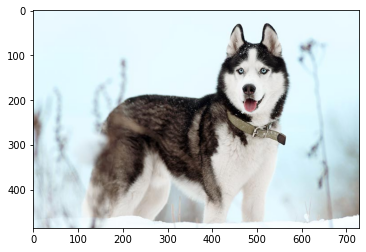

In [42]:
import PIL
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

keras_model = VGG16(weights='imagenet')
keras_model_wrap = get_model_wrapper(keras_model)

with PIL.Image.open('husky.jpeg') as img:
    plt.imshow(img)
    x = np.array(img.resize((32,32), PIL.Image.ANTIALIAS))[np.newaxis]
    x_pp = preprocess_input(np.array(x, copy=True))
    selfTrainedResult = model.predict(x_pp)

# decode_predictions(model.predict(x_pp))

INFO: Detected tensorflow backend for <class 'keras.engine.sequential.Sequential'>.
INFO: Using backend Backend.TENSORFLOW.
INFO: If this seems incorrect, you can force the correct backend by passing the `backend` parameter directly into your get_model_wrapper call.


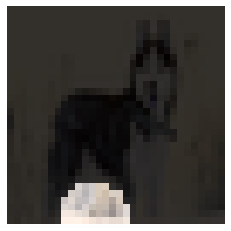

In [45]:
from trulens.nn.models import get_model_wrapper
model_wrapped = get_model_wrapper(model)

# Create the attribution measure.
ig_computer = IntegratedGradients(model_wrapped, resolution=10)
# Calculate the input attributions.
with PIL.Image.open('husky.jpeg') as img:
    x = np.array(img.resize((32,32), PIL.Image.ANTIALIAS))[np.newaxis]
    x_pp = preprocess_input(np.array(x, copy=True))
    input_attributions = ig_computer.attributions(x_pp)
# Visualize the attributions as a mask on the original image.
visualizer = MaskVisualizer(blur=10, threshold=0.95)
visualization = visualizer(input_attributions, x_pp)